In [468]:
import pandas as pd

In [469]:
pd.options.display.max_columns = None # type: ignore

In [470]:
data = pd.read_csv("Cleaned_Dataset.csv")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,1,0,1,0,0,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,3,0,0,1,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,3,0,1,0,0,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,1,0,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,0,0,1,0,0,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [471]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [472]:
# Choosing relevant features

marital_statuses = ["Marital_Status_Divorced", "Marital_Status_Married", 
                    "Marital_Status_Single", "Marital_Status_Unknown"]

demographics_features = ["Customer_Age", "Gender", "Dependent_count", 
                         "Education_Level", "Income_Category"]
demographics_features += marital_statuses

# Credit Card Usage
ccu_features = ["Card_Category","Months_on_book","Total_Revolving_Bal",
                "Avg_Open_To_Buy","Total_Trans_Amt","Total_Trans_Ct",
                "Avg_Utilization_Ratio"]

selected_features = demographics_features + ccu_features

## Model Training

### Data Scaling

In [473]:
modes = data["Customer_Age"].mode()

print("Mean: " + str(data["Customer_Age"].mean()))
print("Median: " + str(data["Customer_Age"].median()))
print("Mode(s): " + ", ".join(str(mode) for mode in modes))

Mean: 46.26211764705882
Median: 46.0
Mode(s): 44, 49


Checking Distributions for other (selected) features that have a large range of data (more than 9 unique values).


In [474]:
selected_features_1 = [] # to plot to find out more about the distribution of the data

for x in selected_features:
    num_uniques = len(data[x].unique()) 
    if num_uniques > 9:
        print(x,":\t\t",num_uniques," unique values", sep='')
        selected_features_1.append(x)

Customer_Age:		45 unique values
Months_on_book:		44 unique values
Total_Revolving_Bal:		1841 unique values
Avg_Open_To_Buy:		5968 unique values
Total_Trans_Amt:		4415 unique values
Total_Trans_Ct:		124 unique values
Avg_Utilization_Ratio:		932 unique values


In [475]:
# Since I already plotted the distribution of "Customer_Age" in the other 
# notebook, I can skip that one.
selected_features_1.remove("Customer_Age")

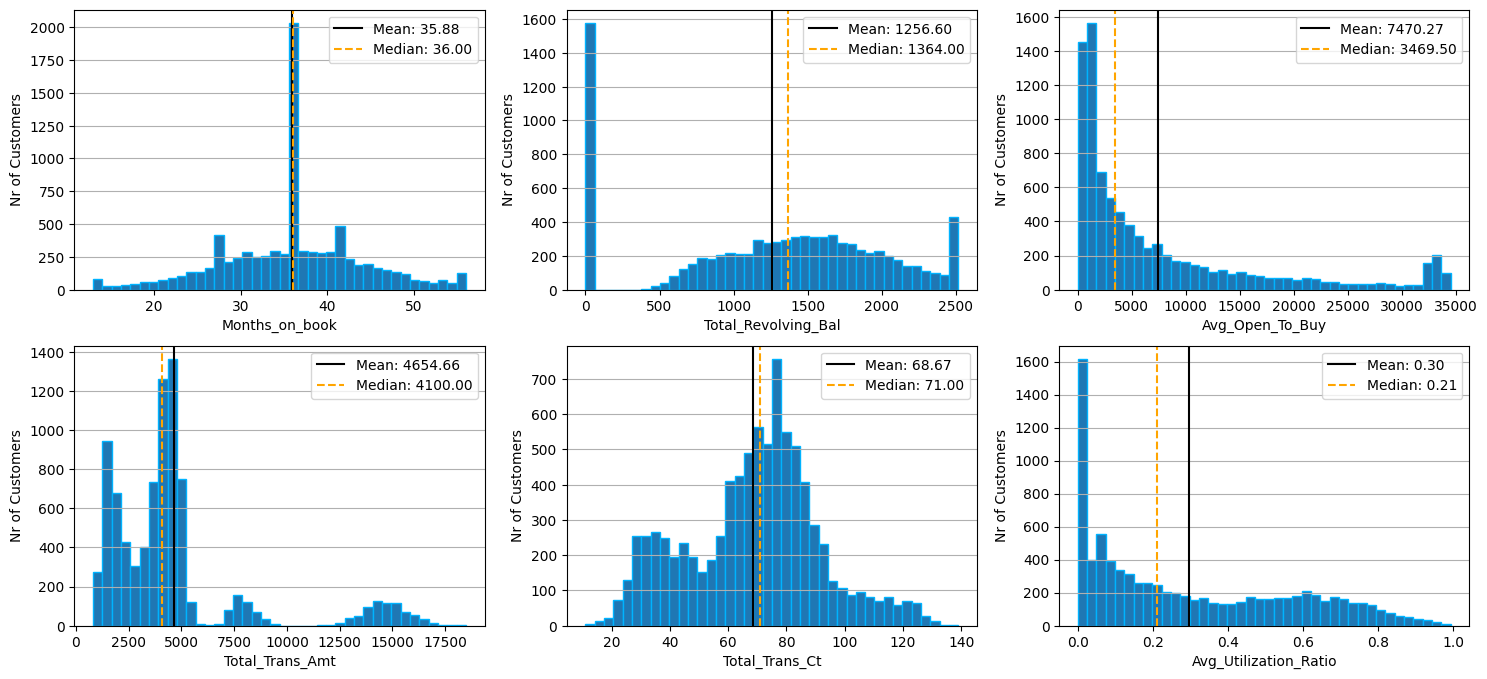

In [476]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
ax_flat = ax.flatten()

for i in range(len(ax_flat)):
    ax_flat[i].hist(data[selected_features_1[i]], bins=40, edgecolor = (0, 0.7, 1))
    ax_flat[i].set_xlabel(selected_features_1[i])
    ax_flat[i].set_ylabel("Nr of Customers")

    plt_mean = data[selected_features_1[i]].mean()
    plt_median = data[selected_features_1[i]].median()
    ax_flat[i].axvline(plt_mean, color="black", label="Mean: {:.2f}".format(plt_mean))
    ax_flat[i].axvline(plt_median, color="orange", label="Median: {:.2f}".format(plt_median), 
                       linestyle="dashed")
    
    ax_flat[i].grid(axis="y")
    ax_flat[i].legend()

plt.show()

In [477]:
data[selected_features].agg(["min", "max"])

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
min,26,0,0,0,0,0,0,0,0,0,13,0,15.0,816,11,0.000
max,73,1,5,6,5,1,1,1,1,3,56,2517,34516.0,18484,139,0.994


In [478]:
from sklearn.preprocessing import MinMaxScaler

In [479]:
scaling = MinMaxScaler()
scaled_data = scaling.fit_transform(data[selected_features])

In [480]:
scaled_data

array([[0.40425532, 1.        , 0.6       , ..., 0.01856464, 0.2421875 ,
        0.06136821],
       [0.4893617 , 0.        , 1.        , ..., 0.02688476, 0.171875  ,
        0.1056338 ],
       [0.53191489, 1.        , 0.6       , ..., 0.06061807, 0.0703125 ,
        0.        ],
       ...,
       [0.59574468, 1.        , 0.2       , ..., 0.83546525, 0.8046875 ,
        0.15191147],
       [0.63829787, 0.        , 0.2       , ..., 0.77994114, 0.8515625 ,
        0.16498994],
       [0.5106383 , 1.        , 0.4       , ..., 0.8297487 , 0.828125  ,
        0.46478873]])

In [481]:
scaled_data = pd.DataFrame(scaled_data, columns=selected_features)

In [482]:
scaled_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0.404255,1.0,0.6,0.166667,0.4,0.0,1.0,0.0,0.0,0.0,0.604651,0.308701,0.344889,0.018565,0.242188,0.061368
1,0.489362,0.0,1.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.720930,0.343266,0.213820,0.026885,0.171875,0.105634
2,0.531915,1.0,0.6,0.500000,0.6,0.0,1.0,0.0,0.0,0.0,0.534884,0.000000,0.098635,0.060618,0.070312,0.000000
3,0.297872,0.0,0.8,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.488372,1.000000,0.022637,0.020093,0.070312,0.764588
4,0.297872,1.0,0.6,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,0.186047,0.000000,0.136257,0.000000,0.132812,0.000000


### Elbow Method

In [483]:
k_range = [n for n in range(1, 11)]
wcss_list = []
for k in k_range:
    kMeans = cluster.KMeans(k).fit(scaled_data[selected_features])
    wcss = kMeans.inertia_ # Within-Cluster Sum of Squares (WCSS)
    wcss_list.append(wcss)

In [484]:
wcss_list

[13094.908523485343,
 10698.93781226405,
 8495.69386468121,
 7407.539880844035,
 7054.830655110978,
 6162.595342275142,
 5841.091972737835,
 5265.856038894217,
 5090.374405413155,
 4840.417030900487]

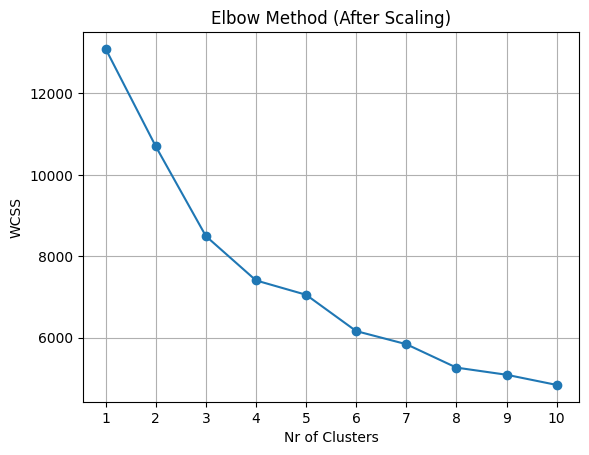

In [485]:
fig, ax = plt.subplots()

ax.plot(k_range, wcss_list, marker="o")
ax.set_ylabel("WCSS")
ax.set_xlabel("Nr of Clusters")
ax.set_title("Elbow Method (After Scaling)")
ax.set_xticks(k_range)
ax.grid()

### Silhouette Scores

In [486]:
k_range = [n for n in range(2, 11)]
sil_scores = []
df_labelSets = pd.DataFrame()

for k in k_range:
    labels = cluster.KMeans(k,random_state=0).fit(scaled_data[selected_features]).labels_
    sil_score = metrics.silhouette_score(scaled_data[selected_features], labels, random_state=0) 
    # print ("Silhouette score for {} clusters is {}".format(k,sil_score))

    sil_scores.append(sil_score)
    df_labelSets.insert(len(df_labelSets.columns), str(k), labels) # Used for "Cluster" column creation

print("Success")

Success


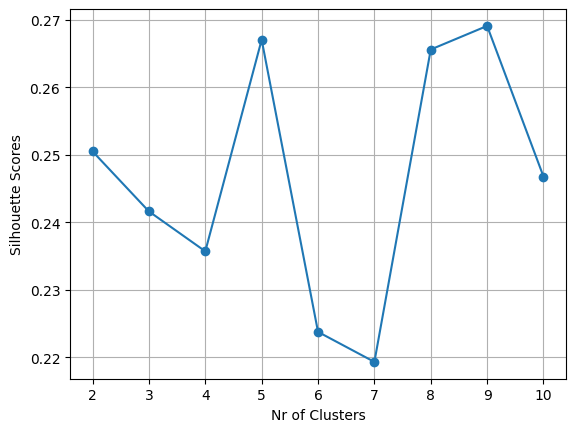

In [487]:
fig, ax = plt.subplots()

ax.plot(k_range, sil_scores, marker="o")
ax.set_ylabel("Silhouette Scores")
ax.set_xlabel("Nr of Clusters")
ax.grid()

plt.show()

In [488]:
print("5 Clusters: " + str(sil_scores[3])) 
print("9 Clusters: " + str(sil_scores[7]))

5 Clusters: 0.26702573641982685
9 Clusters: 0.2690707247348101


Therefore, the new optimal number of clusters is **9**.

In [489]:
scaled_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0.404255,1.0,0.6,0.166667,0.4,0.0,1.0,0.0,0.0,0.0,0.604651,0.308701,0.344889,0.018565,0.242188,0.061368
1,0.489362,0.0,1.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.720930,0.343266,0.213820,0.026885,0.171875,0.105634
2,0.531915,1.0,0.6,0.500000,0.6,0.0,1.0,0.0,0.0,0.0,0.534884,0.000000,0.098635,0.060618,0.070312,0.000000
3,0.297872,0.0,0.8,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.488372,1.000000,0.022637,0.020093,0.070312,0.764588
4,0.297872,1.0,0.6,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,0.186047,0.000000,0.136257,0.000000,0.132812,0.000000


After trying and failing the create some useful scatter plots out of these features, I decided to remove those cells from this notebook, and focus first on Dimensionality Reduction.

### PCA For Dimensionality Reduction

In [490]:
from sklearn.decomposition import PCA
import numpy as np

In [491]:
def calcProportions(width: float, aspect_ratio = 16/9):
    return (width , width / aspect_ratio)

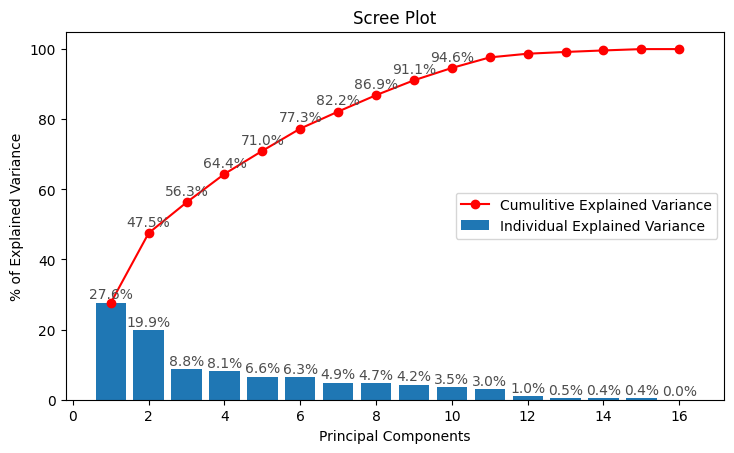

In [492]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

eigenvalues = pca.explained_variance_ # Get the eigenvalues from the PCA object

# Calculate the percentage of explained variance for each component
explained_variance = eigenvalues / sum(eigenvalues) * 100

# Create the scree plot
cumulative_sum = np.cumsum(explained_variance) # Calculate cumulative sum

x_axis = [x for x in range(1, len(explained_variance)+1)]

fig, ax = plt.subplots(figsize=(calcProportions(8.5)))

ax.bar(x_axis,explained_variance, label = "Individual Explained Variance")
ax.plot(x_axis, cumulative_sum, marker='o', color="red", label="Cumulitive Explained Variance")

ax.set_xlabel('Principal Components')
ax.set_ylabel('% of Explained Variance')
ax.set_title('Scree Plot')

RGBA = 0.3

for i in range(1, 10):
    ax.annotate(text="{:.1f}%".format(cumulative_sum[i]), 
                xy=(i+1,cumulative_sum[i]), ha="center", xytext=(0, 5), 
                textcoords="offset points", color=(RGBA, RGBA, RGBA))

for i in range(len(explained_variance)):
    ax.annotate(text="{:.1f}%".format(explained_variance[i]), 
                xy=(i+1,explained_variance[i]), ha="center", xytext=(0, 3), 
                textcoords="offset points", color=(RGBA, RGBA, RGBA))

ax.legend(loc="center right")

plt.show()

Not the results I was hoping for.

In [493]:
pca_3 = PCA(3)
pca_3_data = pca_3.fit_transform(scaled_data)

pca.explained_variance_ratio_

array([2.76217843e-01, 1.99036392e-01, 8.75529453e-02, 8.11232671e-02,
       6.59581531e-02, 6.33838298e-02, 4.85798564e-02, 4.68211625e-02,
       4.24010269e-02, 3.51476964e-02, 3.01326023e-02, 1.04841416e-02,
       5.02368655e-03, 4.30082351e-03, 3.83657331e-03, 3.17579378e-32])

In [494]:
print("{:.2f}%".format(pca.explained_variance_ratio_.sum()*100))

100.00%


In [495]:
pca_df = pd.DataFrame(abs(pca_3.components_), columns=selected_features,index=["PC1", "PC2", "PC3"])
pca_df

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
PC1,0.013521,0.025320,0.005950,0.002876,0.009249,0.015054,0.719433,0.689644,0.014735,0.009390,0.011135,0.032435,0.024423,0.025368,0.045406,0.029064
PC2,0.006776,0.840050,0.015246,0.005790,0.364877,0.003367,0.013627,0.001963,0.012223,0.035453,0.002975,0.045816,0.302569,0.014240,0.022615,0.254739
PC3,0.023558,0.370785,0.076944,0.016946,0.197535,0.153375,0.099106,0.190157,0.135889,0.045977,0.018895,0.610398,0.230536,0.082639,0.099166,0.532821


In [496]:
threshhold = 0.4 # Magnitude to filter with, and list important features

pca_df[pca_df > threshhold].dropna(axis="columns", how="all")

,Gender,Marital_Status_Married,Marital_Status_Single,Total_Revolving_Bal,Avg_Utilization_Ratio
PC1,NaN,0.719433,0.689644,NaN,NaN
PC2,0.84005,NaN,NaN,NaN,NaN
PC3,NaN,NaN,NaN,0.610398,0.532821


### Silhouette Scores on PCs

In [497]:
# k_range = [n for n in range(2, 11)]
# sil_scores = []
# df_labelSets = pd.DataFrame()

# for k in k_range:
#     labels = cluster.KMeans(k,random_state=0).fit(scaled_data[selected_features]).labels_
#     sil_score = metrics.silhouette_score(scaled_data[selected_features], labels, random_state=0) 
#     # print ("Silhouette score for {} clusters is {}".format(k,sil_score))

#     sil_scores.append(sil_score)
#     df_labelSets.insert(len(df_labelSets.columns), str(k), labels) # Used for "Cluster" column creation

# print("Success")

Success
